# How a good data visualization could save lives

by Lana Samoilova

# Introduction 

Ignaz Philipp Semmelweis (1818-1865) was a Hungarian physician and scientist, now known as an early pioneer of antiseptic procedures.   

Described as the "saviour of mothers", at 1846 Semmelweis discovered that the incidence of puerperal fever could be drastically cut by the use of hand disinfection in obstetrical clinics (this fever was common in mid-19th-century hospitals and often fatal).   
  
During 1848, Semmelweis widened the scope of his washing protocol, to include all instruments coming in contact with patients in labour, and used mortality rates time series to document his success in virtually eliminating puerperal fever from the hospital ward.  
  
But these results conflicted with the established scientific and medical opinions of the time and his ideas were rejected by the medical community.   
  
Semmelweis's practice earned widespread acceptance only years after his death, when Louis Pasteur confirmed the germ theory.   
[Wikipedia](https://en.wikipedia.org/wiki/Ignaz_Semmelweis)

# Data

The followed data is used:
- Yearly death by clinic
    - Data Source: [Kaggle](https://www.kaggle.com/arijit75/survey-data#yearly_deaths_by_clinic.csv)
    - Data Description: The yearly data for two clinics under study Clinic 1 with doctors and Clinic 2 with midwives only
- Monthly death
    - Data Source: [Kaggle](https://www.kaggle.com/arijit75/survey-data#yearly_deaths_by_clinic.csv)
    - Data Description: Monthly data for total number of deaths and births that month  



# Methodology 
1. Prepare the necessary tools.
2. Load the "Yearly death by clinic" dataset and compare the death ratio
3. Load the monthly data and make "before and after" analysis.
4. Conclusion

## 1. Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import platform
print('Versions:')
print('  python', platform.python_version())
n = ('numpy', 'pandas', 'matplotlib', 'seaborn')
nn = (np, pd,  matplotlib, sns)
for a, b in zip(n, nn):
    print('  --', str(a), b.__version__)

Versions:
  python 3.6.9
  -- numpy 1.17.3
  -- pandas 0.25.2
  -- matplotlib 3.1.1
  -- seaborn 0.9.0


#### styling

In [2]:
#pandas styling
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_columns', 100, 'display.max_rows', 100, 'colheader_justify', 'left', 'precision', 4)
#pd.reset_option('all')

%matplotlib inline
import matplotlib.ticker as mtick # axes ticks styling
import matplotlib.dates as mdates # to change the format of the dates

#seaborn syling
sns.set_style('whitegrid', { 'axes.axisbelow': True, 'axes.edgecolor': 'black', 'axes.facecolor': 'white',
        'axes.grid': True, 'axes.labelcolor': 'black', 'axes.spines.bottom': True, 'axes.spines.left': True,
        'axes.spines.right': False, 'axes.spines.top': False, 'figure.facecolor': 'white', 
        'grid.color': 'grey', 'grid.linestyle': ':', 'image.cmap': 'rocket', 'lines.solid_capstyle': 'round',
        'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'text.color': 'black', 
        'xtick.top': False, 'xtick.bottom': True, 'xtick.color': 'navy', 'xtick.direction': 'out', 
        'ytick.right': False,    'ytick.left': True, 'ytick.color': 'navy', 'ytick.direction': 'out'})

In [3]:
# customizing print()
from IPython.display import display, Markdown
def printst(string):
    display(Markdown('<strong>{}</strong>'.format(string))) 
def printbd(string):
    display(Markdown('<bold>{}</bold>'.format(string)))

## 2. Yearly death by clinic

In [4]:
ydf = pd.read_csv('.../Handwashing_yearly_deaths_by_clinic.csv')
ydf.shape

(12, 4)

The data set is so small, what we can print it all

In [5]:
ydf

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Let's add a ratio death to birth in percentages and plot results

In [6]:
ydf['ratio,%'] = (ydf['deaths']*100/ ydf['births'])
# ydf.sample()

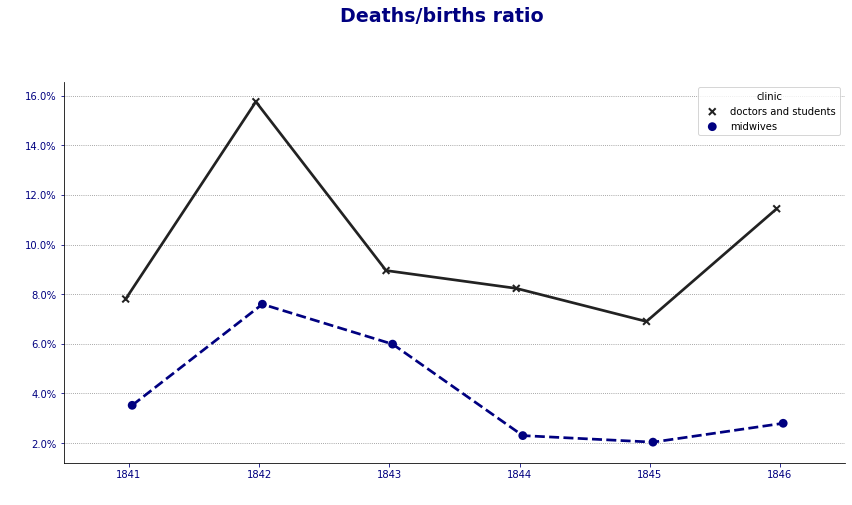

In [7]:
pdf = ydf.copy()
pdf['clinic'] = pdf['clinic'].replace({'clinic 1': 'doctors and students', 'clinic 2': 'midwives'})
x,y,z = 'year', 'ratio,%', 'clinic'

f, ax = plt.subplots(figsize=(14,7))
sns.pointplot(x=x, y=y, hue=z, data=pdf, color='navy', join=True, markers=["x","o"], linestyles=["-","--"], capsize=True, dodge=True)

plt.suptitle('Deaths/births ratio', size=19, x=0.5, y=1.03, weight='heavy', color='navy')

plt.xlabel(' ', color='navy', fontsize=14)
plt.ylabel('  ', color='navy', fontsize=14)
ax.tick_params(labelsize=10, colors='navy', which='both')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    
plt.show() 

The difference is so huge!

In [8]:
printst('Death/birth ratio statistic for 6 years:')
c1 = ydf.loc[ydf['clinic']== 'clinic 1']['ratio,%'].describe().to_frame().T
c2 = ydf.loc[ydf['clinic']== 'clinic 2']['ratio,%'].describe().to_frame().T
c1 = c1.rename({'ratio,%': 'Doctors clinic'})
c2 = c2.rename({'ratio,%': 'Midwives clinic'})
c1.append(c2).drop(['count', '25%', '75%'], axis=1)

<strong>Death/birth ratio statistic for 6 years:</strong>

,mean,std,min,50%,max
Doctors clinic,10,3,7,9,16
Midwives clinic,4,2,2,3,8


Dr. Semmelweis started his work to identify the cause of this tremendous  difference. After times of hard try, he found what at the "clinic 1" doctors  performed autopsies in the morning and then worked in the maternity ward. The midwives (clinic 2) didn't have a contact with any corpses.

Dr. Semmelweis hypothesized that some kind of poisonous were being transfered by the doctors from the corpses to mothers. He found a chlorinaded lime solution was good to remove the smell of autopsy and decided it would be ideal for removing these deadly things.

He created and launced his handwashing policy.

## 3. Monthly death "before and after"

In [9]:
mdf = pd.read_csv('.../Handwashing_monthly_deaths.csv')
mdf.shape

(98, 3)

In [10]:
mdf.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [11]:
mdf['date'] = pd.to_datetime(mdf['date'])#.dt.to_period('M')
mdf['ratio,%'] = (mdf['deaths']*100/ mdf['births'])

In [12]:
date0 = pd.to_datetime('1841-01-01') # first date of analysis
date1 = pd.to_datetime('1847-05-01') # handwashing was started
date2 = pd.to_datetime('1848-01-01') # strict control was started
date3 = pd.to_datetime('1849-03-01') # Dr.Semmelweis dismissed

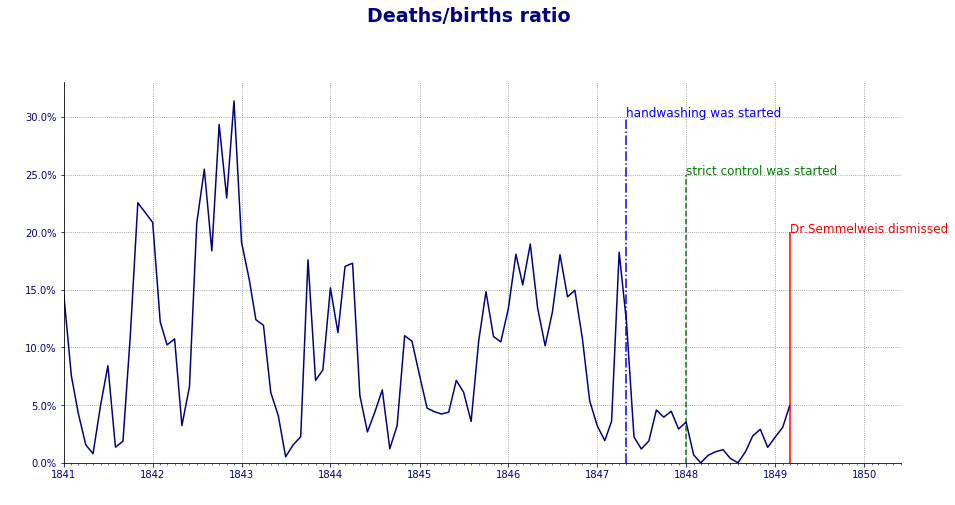

In [13]:
f, ax = plt.subplots(figsize=(15,7))

sns.lineplot('date', 'ratio,%', data=mdf, color='navy')
plt.suptitle('Deaths/births ratio', size=19, x=0.5, y=1.03, weight='heavy', color='navy')

plt.xlabel(' ', color='navy', fontsize=14)
plt.ylabel('  ', color='navy', fontsize=14)
ax.tick_params(labelsize=10, colors='navy', which='both')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
plt.xlim(['1841-01-01', '1850-06-01'])
plt.ylim(0, 33)
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 

matplotlib.pyplot.vlines(date1, 0, 30, colors='blue', linestyles='dashdot', label='handwashing was started')
matplotlib.pyplot.vlines(date2, 0, 25, colors='green', linestyles='dashed', label='strict control was started')
matplotlib.pyplot.vlines(date3, 0, 20, colors='red', linestyles='solid', label='Dr.Semmelweis dismissed')
ax.text(date1, 30, 'handwashing was started', ha='left', size=12, color='blue')
ax.text(date2, 25, 'strict control was started', ha='left', size=12, color='green')
ax.text(date3, 20, 'Dr.Semmelweis dismissed', ha='left', size=12, color='red')

plt.show() 

Semmelweis had the truth but it was not enough.
“Doctors are gentlemen and a gentleman’s hands are clean.” - said an american obstetrician Cahrles Meigs and this phrase shows us a common opinion that time.  

“It is dangerous to be right in matters on which the established authorities are wrong.” Voltaire once said.

Semmelweis paid dearly for his “heretical” handwashing ideas. In 1849, he was unable to renew his position in the maternity ward and was blocked from obtaining similar positions in Vienna. A frustrated and demoralized Semmelweis moved back to Budapest. He watched his theory be openly attacked in medical lecture halls and medical publications throughout Europe. He wrote increasingly angry letters to prominent European obstetricians denouncing them as irresponsible murderers and ignoramuses. The rejection of his lifesaving insights affected him so greatly that he eventually had some kind of mental breakdown, and he was committed to a mental institution in 1865. Two weeks later he was dead at the age of 47—succumbing to an infected wound inflicted by the asylum’s guards.

Semmelweis’s data was was great - truthful, valuable and actionable, but the idea was failed. 
Let's try to understand why.

- Semmelweis publish his "The Etiology, Concept, and Prophylaxis of Childbed Fever" in 1861. But during 14 years, from inventing to publishing, medical community misinterpreted and misrepresented his claim.   
    Lesson 1: keep your data clear and timely.
- Semmelweis was not able to understand why people wouldn't accept his advise. He insulted other doctors, became rude and intolerant.   
    Lesson 2: always remember about cognitive bias named "curse of knowledge" - know your audience, strive to understand them. And look for open-minded allies.
- He felt emotion instead to evoke them.   
Lesson 3: Use logic and reason to make your job, but use narratives  to show it.   

Let's try to use this - I'll show the same data but in other way:

In [14]:
date11 = pd.to_datetime('1847-09-01') # just a date to set arrow on a plot

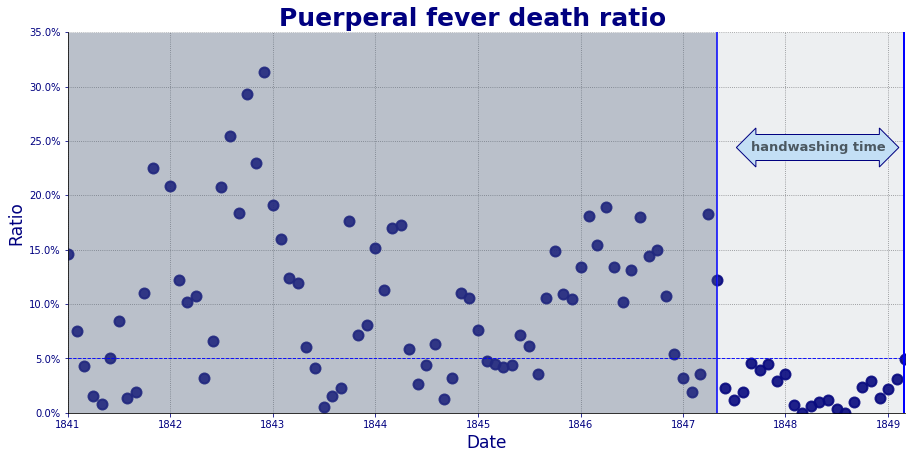

In [15]:
f, ax = plt.subplots(figsize=(15,7))

plt.scatter(mdf['date'], mdf['ratio,%'], s=100, c='navy', alpha=0.9, edgecolors='navy', linewidth=2)
plt.suptitle('Puerperal fever death ratio', size=25, x=0.5, y=.93, weight='heavy', color='navy')

plt.xlabel('Date', color='navy', fontsize=17)
plt.ylabel('Ratio', color='navy', fontsize=17)
ax.tick_params(labelsize=10, colors='navy', which='both')

ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
ax.set_ylim([0,35])
ax.set_xlim([date0, date3])

plt.axhline(y=5, c='blue', linestyle='--', linewidth=.9,  label=' ')
plt.vlines(date1, 0, 35, colors='blue', linestyles='solid', label='handwashing was started')
plt.vlines(date3, 0, 35, colors='blue', linestyles='solid', label='', linewidth=4)
plt.axvspan(date0, date1, facecolor='#53637c', alpha=0.4)
plt.axvspan(date1, date3, facecolor='#53637c', alpha=0.1)

bbox_props = dict(boxstyle='darrow, pad=.5', fc='#c3dff5', ec='navy', lw=1)
t = ax.text(date11, 25, 'handwashing time', ha='left', va='top', rotation=0, size=13, bbox=bbox_props, color='#4b5861', weight='semibold')

plt.show()

"More than 30% and less than 5%" - sounds more fearsome, isn't it?
It's the same plot is visualized in other way, but what if we change it even a little bit more?

In [16]:
df = mdf[['date', 'ratio,%']]
df = df.set_index('date').resample('A').mean()
df.index = df.index.year.astype('str')
df = df.reset_index()

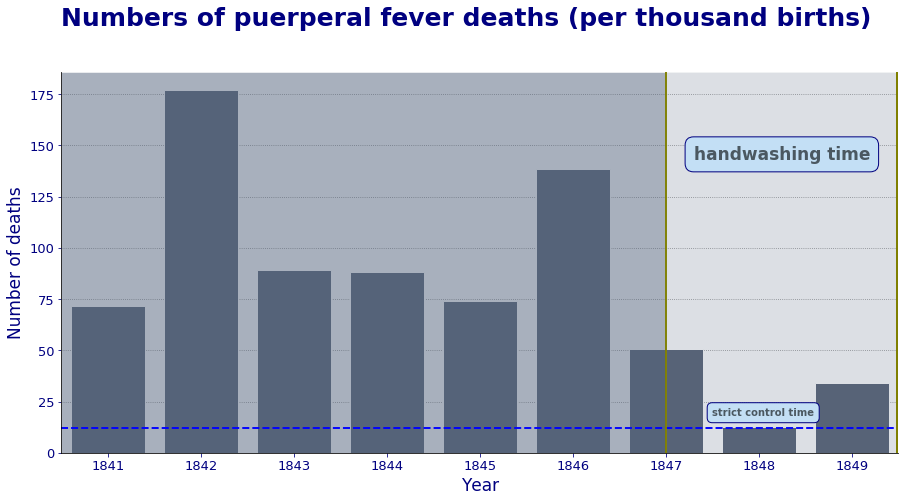

In [17]:
f, ax = plt.subplots(figsize=(15,7))
sns.barplot(df.index, df['ratio,%']*10, dodge=True, color='#53637c')
plt.suptitle('Numbers of puerperal fever deaths (per thousand births)', size=25, x=0.5, y=1.01, weight='heavy', color='navy')

plt.xlabel('Year', color='navy', fontsize=17)
plt.ylabel('Number of deaths', color='navy', fontsize=17)
plt.xlim([-0.5, 8.5])
ax.set_xticklabels(df.date) 
ax.tick_params(labelsize=13, colors='navy', which='both')

plt.axhline(y=12, c='blue', linestyle='--', linewidth=1.9,  label=' ')
plt.axvline(6,0,17, c='olive', linestyle='-', linewidth=1.9,  label=' ')
plt.axvline(8.5,0,17, c='olive', linestyle='-', linewidth=4,  label=' ')

plt.axvspan(-0.5, 6, facecolor='#53637c', alpha=0.5)
plt.axvspan(6, 8.5, facecolor='#53637c', alpha=0.2)

bbox_props1 = dict(boxstyle='round, pad=.5', fc='#c3dff5', ec='navy', lw=1)
t = ax.text(6.3, 150, 'handwashing time', ha='left', va='top', rotation=0, size=17, bbox=bbox_props1, color='#4b5861', weight='semibold')

bbox_props2 = dict(boxstyle='round, pad=.5', fc='#c3dff5', ec='navy', lw=1)
t = ax.text(6.5, 22, 'strict control time', ha='left', va='top', rotation=0, size=10, bbox=bbox_props2, color='#4b5861', weight='semibold')

plt.show()

- Semmelweis had his data only as data tables. Not many people can read that.    
Lesson 4: good data visualization is the key.  

It's simple to criticize others mistakes, especially that were made more than 150 years ago. But history is the best teacher and we need study to use it.

## 4. Conclusion

Data and data analysis are the flesh and blood of the modern world, but this alone is not enough.

We must learn to present the results of the analysis in such a way that they are understandable to everyone.   

"Sticky" idea and it's clear visualization are the keys.